In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
%cd /content/drive/MyDrive/Colab Notebooks/KDT_Natural_Language

/content/drive/MyDrive/Colab Notebooks/KDT_Natural_Language


# 13th mini project
---
- dataset: fake news, true news


## [1] 데이터 로딩 & 전처리
---

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import tensorflow as tf
#import string
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [ ]:
nltk.download('all')

In [98]:
df_fake = pd.read_csv("../data/Fake.csv")
df_true = pd.read_csv("../data/True.csv")

In [99]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [100]:
print(f'Fake news shape: {df_fake.shape}')
print(f'True news shape: {df_true.shape}')

Fake news shape: (23481, 4)
True news shape: (21417, 4)


In [101]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [102]:
df_fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [103]:
 df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [104]:
df_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [105]:
# target 열 생성
df_true['label']=1
df_fake['label']=0

In [106]:
# 데이터프레임 합치기
df_news = pd.concat([df_fake, df_true], axis =0 )

In [107]:
# 불필요한 컬럼 제거
df_news = df_news.drop(['title','subject','date'], axis = 1)

In [108]:
df_news.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [109]:
# 결측치 확인
df_news.isnull().sum()

text     0
label    0
dtype: int64

In [110]:
# 중복 데이터 체크 및 삭제
df_news.duplicated().sum()

6251

In [111]:
# 형태 확인
df_news.shape

(44898, 2)

In [112]:
# 데이터프레임 행 섞기
df_news = df_news.sample(frac=1).reset_index(drop=True)
df_news.head()

,text,label
0,KIEV (Reuters) - Ukraine says it will review a...,1
1,CAIRO (Reuters) - Armed militants killed at le...,1
2,In response to the establishment media s cont...,0
3,RIYADH (Reuters) - Two Saudi guards were shot ...,1
4,A nonprofit legal watchdog claimed Thursday th...,0


In [414]:
# data, target 나누기
data = df_news["text"]
target = df_news["label"]

print(data.shape, target.shape)

(44898,) (44898,)


In [415]:
# train, test ,validation 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 42,stratify=target,test_size= 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state = 42,stratify=y_train,test_size= 0.2)
print(f'x_train.shape:{x_train.shape}, y_train.shape:{y_train.shape} ') 
print(f'x_test.shape:{x_test.shape}, y_test.shape:{y_test.shape}')
print(f'x_val.shape:{x_val.shape}, y_val.shape:{y_val.shape}')

x_train.shape:(28734,), y_train.shape:(28734,) 
x_test.shape:(8980,), y_test.shape:(8980,)
x_val.shape:(7184,), y_val.shape:(7184,)


In [416]:
x_train[0],y_train[:10]

('KIEV (Reuters) - Ukraine says it will review a request from Georgia to arrest and extradite former Georgian president Mikheil Saakashvili, one of the most colorful and divisive figures in the politics of both countries, if he re-enters Ukraine in the next few days. Brought in to help drive reforms after the 2014 Ukrainian uprising that ousted a pro-Russian leader, Saakashvili has been at loggerheads with the Kiev authorities since quitting as governor of the Odessa region last year and accusing President Petro Poroshenko of abetting corruption. Stripped of Ukrainian citizenship while on a trip abroad, he  will try to re-enter Ukraine via the Polish border on Sunday, his staff and lawyers say, and expects to be greeted by supporters and lawmakers sympathetic to his cause. It is unclear how Ukrainian border guards will respond.  The justice ministry is sending the request from Georgia ... to Ukraine s general prosecutor for an extradition review,  Deputy Justice Minister Serhiy Petukho

## [2] 텍스트 분류
---
- 토큰화
- 불용어 처리
- 정규식(영어로만 이루어진 단어)
- 소문자 변환
- 표제어 추출
- 문장 형태로 복원

In [417]:
# 텍스트 전처리 함수 
stop_words = set(stopwords.words('english')) 

def preprocessingText(sentence):
    lemma_words = []
    wordnet_lemmatizer = WordNetLemmatizer()

    # 토큰화
    word_tokens = word_tokenize(sentence) 
    for word in word_tokens: 
        
        # 불용어 처리
        if word not in stop_words: 
            # 알파벳조합을 제외한 모든 문자 제거
            new_word = re.sub('[^a-zA-Z]', '',word)
            # 소문자로 변환
            new_word = new_word.lower()
            # 표제어 추출
            new_word = wordnet_lemmatizer.lemmatize(new_word)
            
            lemma_words.append(new_word)
            #lemma_words.append(word)
            
    
    # 단어 -> 문장으로 복원
    return " ".join(lemma_words)

data = [preprocessingText(i) for i in data]

In [418]:
x_train = [preprocessingText(i) for i in x_train]
x_test = [preprocessingText(i) for i in x_test]
x_val = [preprocessingText(i) for i in x_val]

In [419]:
x_train[0],x_test[0],x_val[0]

('houston  reuters   taco truck houston begun doubling voter registration site latino texas flex political muscle nov  presidential election state long symbolized mexican immigration united state  riffing widely ridiculed comment marco gutierrez  supporter republican presidential nominee donald trump  without action immigration reform    going taco truck every corner   nonpartisan civic group mi familia vota driving effort reach firsttime voter   we latino group growth texas   translated political sphere   said houston coordinator carlos zamora   we want build political capital  although texas republican stronghold  demographic lone star state seen shifting favor democrat steady increase hispanic voter  historically favored party  in  election  latino nationally voted democratic president barack obama republican mitt romney  percent  percent  according exit poll  the pew research center estimated year  percent texan hispanic  million latino eligible vote state  historically  voter regi

In [420]:
# 텍스트 수치화
def transformText(data, num_words):
  tokenizer = Tokenizer(num_words= num_words) # num_words 
  tokenizer.fit_on_texts(data)
  seq_data = tokenizer.texts_to_sequences(data)
  
  # 사전 단어 총개수
  voca_word_num = len(tokenizer.word_index)
  return(seq_data,voca_word_num)

In [421]:
seq_x_train,voca_word_num_x_train = transformText(x_train,1000)
seq_x_test,voca_word_num_x_test = transformText(x_test,1000)
seq_x_val,voca_word_num_x_val = transformText(x_val,1000)
print(f'단어사전 단어 개수: {voca_word_num_x_train}')

단어사전 단어 개수: 152119


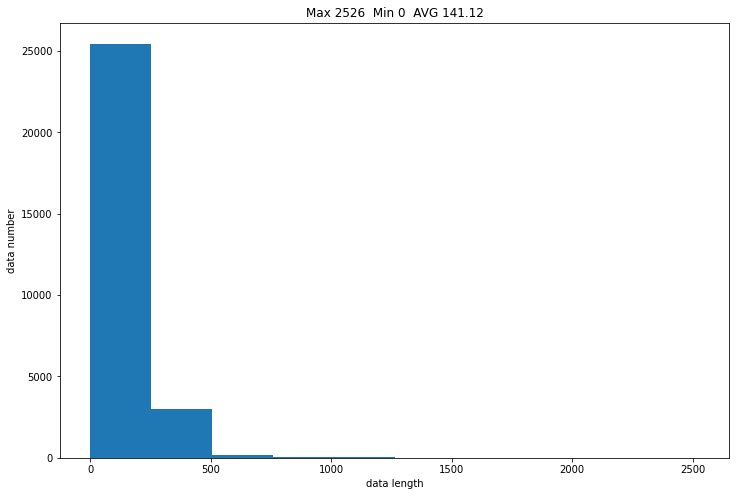

In [422]:
# 단어 갯수 파악 함수
def checkLength(datas):

  # 기사 개당 단어 개수
  length=[len(data) for data in datas]
  
  # 히스토그램
  plt.figure(figsize=(12,8))
  plt.hist(length)
  plt.title(f'Max {max(length)}  Min {min(length)}  AVG {round(sum(length)/len(length),2)}')
  plt.xlabel('data length')
  plt.ylabel('data number')
  plt.show()
# return length
  
checkLength(seq_x_train)    

In [423]:
# 패딩 설정:300
pad_length = 300
pad_x_train = pad_sequences(seq_x_train, maxlen= pad_length)
pad_x_test = pad_sequences(seq_x_test, maxlen= pad_length)
pad_x_val = pad_sequences(seq_x_val, maxlen= pad_length)

In [424]:
# # 원핫인코딩
# oh_data = to_categorical(pad_data)

## [3] 모델 생성
---


In [425]:
from tensorflow.keras.layers import SimpleRNN, GRU,Embedding, Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [426]:
EMB_DIM = 32                     # 임베딩 벡터 크기 
WORD_NUM = voca_word_num_x_train # 단어사전 수
HIDDEN_NODE = 100                 # 은닉층 뉴런 수
INPUT_LENGH = pad_length         # 1문장의 토큰 수

In [427]:
print(INPUT_LENGH,voca_word_num_x_train )

300 152119


In [428]:
model = Sequential() #EMB_DIM
model.add(Embedding(WORD_NUM,EMB_DIM, input_length=INPUT_LENGH))
model.add(Dropout(0.8))
model.add(GRU(HIDDEN_NODE,dropout=0.8,return_sequences=True))
model.add(Dropout(0.8))
model.add(GRU(HIDDEN_NODE,dropout=0.8))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 300, 32)           4867808   
                                                                 
 dropout_49 (Dropout)        (None, 300, 32)           0         
                                                                 
 gru_39 (GRU)                (None, 300, 100)          40200     
                                                                 
 dropout_50 (Dropout)        (None, 300, 100)          0         
                                                                 
 gru_40 (GRU)                (None, 100)               60600     
                                                                 
 dropout_51 (Dropout)        (None, 100)               0         
                                                                 
 dense_30 (Dense)            (None, 1)               

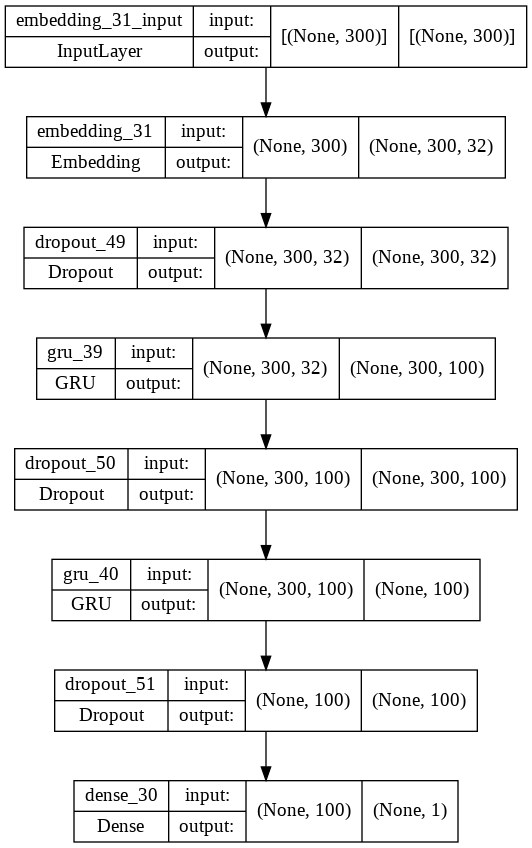

In [429]:
plot_model(model, show_shapes=True)

In [430]:
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf
adam = tf.keras.optimizers.Adam(learning_rate =0.001)

In [431]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['acc'])

# patience
patience_earlystop = 10
patience_ReduceLROnPlateau = 3

# EarlyStop
earlystop = EarlyStopping(monitor='val_loss',
                          mode='min',
                          patience=patience_earlystop,
                          verbose=1)

# Learning Rate 조절 (변화량 0.1)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=patience_ReduceLROnPlateau, 
                                            verbose=1, 
                                            factor=0.1, 
                                            min_lr=1e-10)

In [432]:
epochs=30
batch_size=64

history = model.fit(pad_x_train,
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(pad_x_val,y_val),
                    callbacks=[earlystop, learning_rate_reduction])

Epoch 1/30
449/449 [==============================] - 19s 34ms/step - loss: 0.5685 - acc: 0.6702 - val_loss: 0.5053 - val_acc: 0.7490 - lr: 0.0010
Epoch 2/30
449/449 [==============================] - 15s 33ms/step - loss: 0.2777 - acc: 0.8981 - val_loss: 0.5001 - val_acc: 0.8182 - lr: 0.0010
Epoch 3/30
449/449 [==============================] - 15s 33ms/step - loss: 0.2596 - acc: 0.9044 - val_loss: 0.5806 - val_acc: 0.7739 - lr: 0.0010
Epoch 4/30
449/449 [==============================] - 15s 33ms/step - loss: 0.1755 - acc: 0.9387 - val_loss: 0.3519 - val_acc: 0.8622 - lr: 0.0010
Epoch 5/30
449/449 [==============================] - 15s 33ms/step - loss: 0.1398 - acc: 0.9545 - val_loss: 0.1697 - val_acc: 0.9518 - lr: 0.0010
Epoch 6/30
449/449 [==============================] - 15s 33ms/step - loss: 0.1153 - acc: 0.9604 - val_loss: 0.1474 - val_acc: 0.9418 - lr: 0.0010
Epoch 7/30
449/449 [==============================] - 15s 32ms/step - loss: 0.0986 - acc: 0.9671 - val_loss: 0.1440 - 

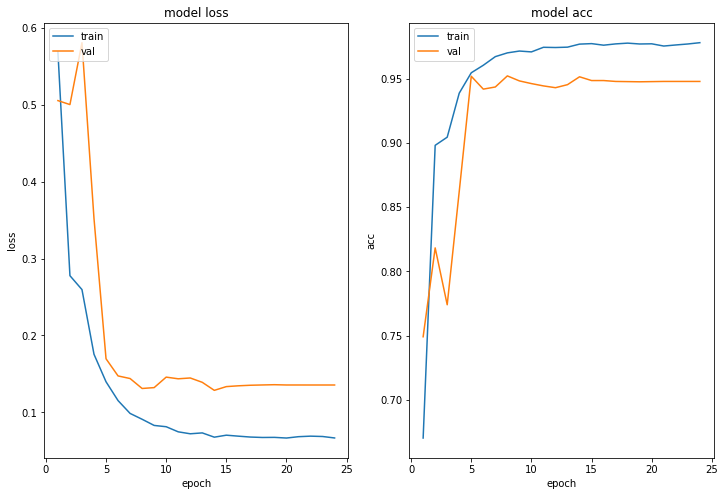

In [434]:
# 학습 히스토리 시각화
epochs = range(1,25)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()



In [438]:
pad_x_test.shape,y_test.shape

((8980, 300), (8980,))

In [450]:
model.predict(pad_x_test)[:10]

array([[1.2589702e-02],
       [4.4092923e-01],
       [3.4542228e-04],
       [7.6402807e-01],
       [8.2626581e-01],
       [5.9793717e-03],
       [8.4875929e-01],
       [8.9623936e-02],
       [3.7073366e-02],
       [4.3482051e-04]], dtype=float32)

In [511]:
fake1 = """West Midlands Police have asked people to be mindful of misinformation and rumour on social media after two protests took place.

About 50 people gathered near a Hindu temple in Coventry on Thursday. Earlier, 150 people met in Smethwick which resulted in minor disorder.

The reasons surrounding the protests are complex, police said, but added it was working with community leaders.

Unsubstantiated claims on social media can have a serious impact, it warned.

A spokesman said there had been several instances of fake news and unsubstantiated claims being spread on social media and messaging services.

These include:

"""

In [512]:
real1 ="""just before Labor Day of this year, the Walters Art Museum’s executive director, Julia Marciari-Alexander, sent an email to staff, the public, and the press admonishing the museum’s unionizing workers for not “taking the necessary steps within their control in order to proceed to a union vote.” She reiterated her previous comments that leadership “support[s] our employees’ right to consider unionization” and that the process must be decided through an election conducted by the National Labor Relations Board. """

In [513]:
fake1 = [preprocessingText(fake1)]
fake1,voca_word_num_test = transformText(fake1,300)
fake1 = pad_sequences(fake1, maxlen= pad_length)

In [514]:
# 진위여부 함수
def real_or_fake(article, fact):
  print('------------------------')
  print('     뉴스 진위 여부     ')
  print('------------------------')

  pred = model.predict(article)
  print(pred)
  
  print('[ 실제 ]')
  print(f'=> {fact}')
  print('[ 예측 ]')
  if pred >0.5:
    print('=> 이 뉴스는 진짜 뉴스입니다.')
  else:
    print('=> 이 뉴스는 가짜 뉴스입니다.')



In [515]:
real_or_fake(fake1,'가짜 기사')

------------------------
     뉴스 진위 여부     
------------------------
[[0.9918119]]
[ 실제 ]
=> 가짜 기사
[ 예측 ]
=> 이 뉴스는 진짜 뉴스입니다.


In [516]:
real1 = [preprocessingText(real1)]
real1,voca_word_num_test = transformText(real1,300)
real1 = pad_sequences(real1, maxlen= pad_length)

In [517]:
real_or_fake(real1,'진짜 기사')

------------------------
     뉴스 진위 여부     
------------------------
[[0.9905351]]
[ 실제 ]
=> 진짜 기사
[ 예측 ]
=> 이 뉴스는 진짜 뉴스입니다.


### PassiveAggressiveClassifier
---
- 인스턴스를 순차적으로, 개별적으로 또는 미니 배치라고 하는 소규모 그룹으로 공급하여 시스템을 점진적으로 훈련하는 온라인 학습 알고리즘 -> 데이터 연속 스트림 시 유리

In [506]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [507]:
# train, test 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 42)

In [508]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
x_train_pac = tfidf.fit_transform(x_train)
x_test_pac = tfidf.transform(x_test)

Accuracy: 99.34%


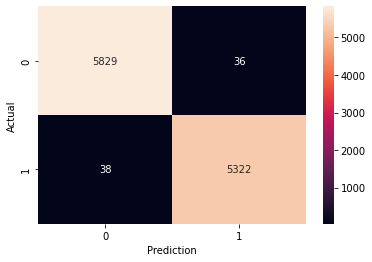

In [510]:
# pac 

# PAC 모델 구축
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(x_train_pac, y_train.values.ravel())

# 예측 점수
y_pred_pac= pac.predict(x_test_pac)
score_pac = accuracy_score(y_test, y_pred_pac)
print(f'Accuracy: {round(score_pac*100, 2)}%')

# 혼동행렬
ax = sns.heatmap(confusion_matrix(y_test,y_pred_pac), annot=True, fmt="d")
ax.set(xlabel='Prediction', ylabel='Actual')
plt.show()